In [1]:
# Gamma Correction
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

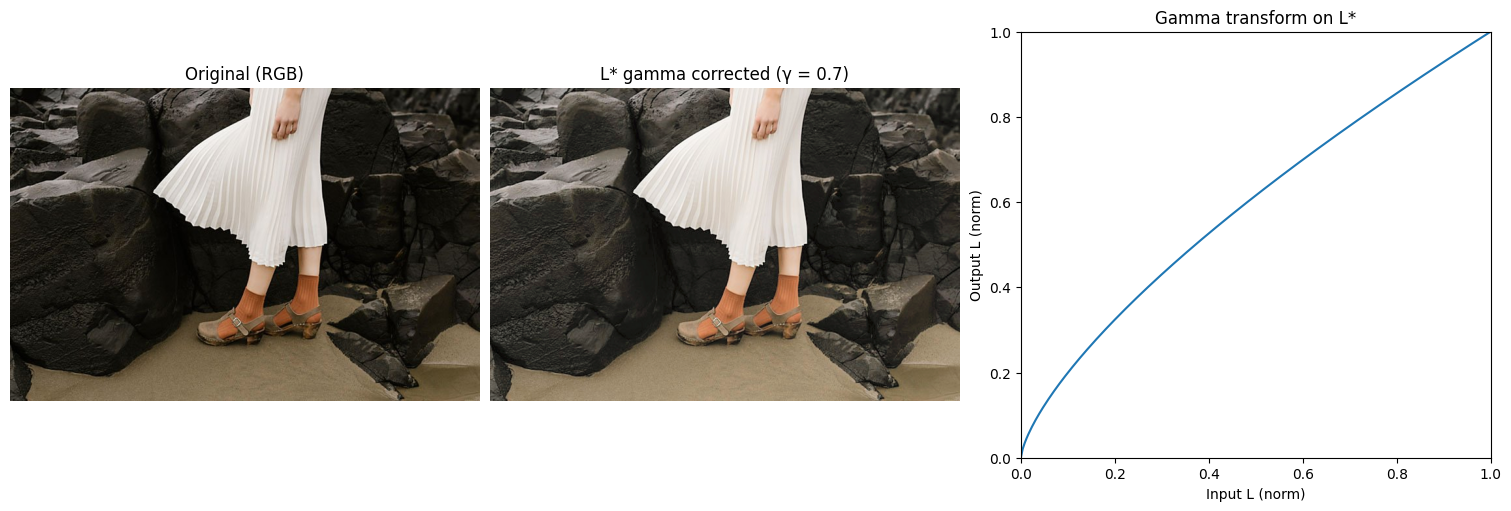

In [2]:
gamma = 0.7

img_path = r"a1images\highlights_and_shadows.jpg"
bgr = cv.imread(img_path, cv.IMREAD_COLOR)

# --- convert to Lab and split channels ---
lab = cv.cvtColor(bgr, cv.COLOR_BGR2LAB)
L, a, b = cv.split(lab)                 # OpenCV L in [0,255] (scaled from [0,100])

# --- build gamma LUT for L (0..255) and apply only to L ---
t = np.clip(((np.arange(256) / 255.0) ** gamma) * 255.0, 0, 255).astype(np.uint8)
L_gamma = cv.LUT(L, t)

# --- merge back and convert to BGR for viewing ---
lab_gamma = cv.merge([L_gamma, a, b])
bgr_gamma = cv.cvtColor(lab_gamma, cv.COLOR_LAB2BGR)

# --- visualize (convert BGR->RGB for matplotlib) ---
rgb = cv.cvtColor(bgr, cv.COLOR_BGR2RGB)
rgb_gamma = cv.cvtColor(bgr_gamma, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
ax[0].imshow(rgb);        ax[0].set_title("Original (RGB)"); ax[0].axis("off")
ax[1].imshow(rgb_gamma);  ax[1].set_title(f"L* gamma corrected (γ = {gamma})"); ax[1].axis("off")

# transformation function
x = np.linspace(0, 1, 256)
y = x ** gamma
ax[2].plot(x, y); ax[2].set_xlim(0,1); ax[2].set_ylim(0,1)
ax[2].set_title("Gamma transform on L*"); ax[2].set_xlabel("Input L (norm)"); ax[2].set_ylabel("Output L (norm)")
plt.show()

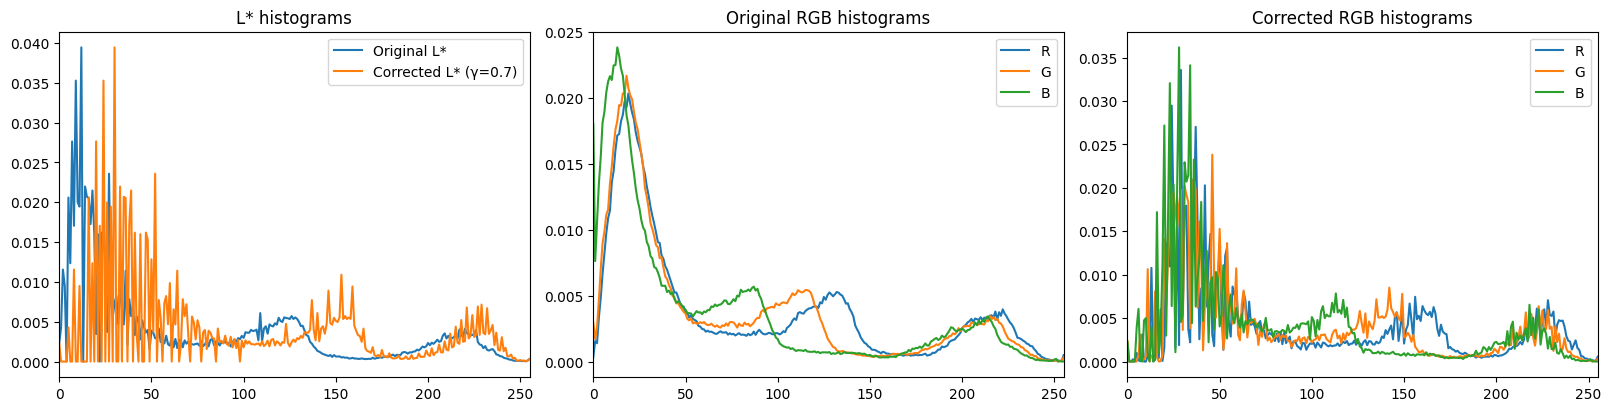

In [3]:
# -- L* histograms (overlay) --
L_hist,  _ = np.histogram(L.ravel(),  bins=256, range=(0,255))
Lg_hist, _ = np.histogram(L_gamma.ravel(), bins=256, range=(0,255))

# normalize to compare shapes
L_hist  = L_hist  / L_hist.sum()
Lg_hist = Lg_hist / Lg_hist.sum()

# -- RGB channel histograms for each image --
def rgb_hists(img_rgb):
    h = []
    for c in range(3):
        hist, _ = np.histogram(img_rgb[..., c].ravel(), bins=256, range=(0,255))
        h.append(hist / hist.sum())
    return h  # [R, G, B]

R_o, G_o, B_o = rgb_hists(rgb)
R_c, G_c, B_c = rgb_hists(rgb_gamma)

fig2, ax2 = plt.subplots(1, 3, figsize=(16, 4), constrained_layout=True)

# (a) L* overlay
xs = np.arange(256)
ax2[0].plot(xs, L_hist,  label="Original L*")
ax2[0].plot(xs, Lg_hist, label=f"Corrected L* (γ={gamma})")
ax2[0].set_xlim(0,255); ax2[0].set_title("L* histograms"); ax2[0].legend()

# (b) Original RGB hists
ax2[1].plot(xs, R_o, label="R")
ax2[1].plot(xs, G_o, label="G")
ax2[1].plot(xs, B_o, label="B")
ax2[1].set_xlim(0,255); ax2[1].set_title("Original RGB histograms"); ax2[1].legend()

# (c) Corrected RGB hists
ax2[2].plot(xs, R_c, label="R")
ax2[2].plot(xs, G_c, label="G")
ax2[2].plot(xs, B_c, label="B")
ax2[2].set_xlim(0,255); ax2[2].set_title("Corrected RGB histograms"); ax2[2].legend()

plt.show()